# 1- L'importation des données :

Dans un premier temps on importe les bibliothèques dont on aura besoin :

In [107]:
import os
from fnmatch import fnmatch
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split,KFold
from sklearn import preprocessing
import seaborn as sns
from sklearn.metrics import confusion_matrix,classification_report
%matplotlib inline
from sklearn.svm import SVC
import warnings
warnings.filterwarnings('ignore')

On utilise la bibliothèque pandas pour récupérer les données à partir d'un fichier csv qu'on le met soit dans le meme dossier que notre notebook ou on initialise la fonction read_csv() par le chemin dont on a notre fichier.

In [108]:
df_Energy=pd.read_csv('energydata_complete.csv')
df_Energy.head(3)

,date,Appliances,lights,T1,RH_1,T2,RH_2,T3,RH_3,T4,...,T9,RH_9,T_out,Press_mm_hg,RH_out,Windspeed,Visibility,Tdewpoint,rv1,rv2
0,2016-01-11 17:00:00,60,30,19.89,47.596667,19.2,44.790000,19.79,44.730000,19.000000,...,17.033333,45.53,6.600000,733.5,92.0,7.000000,63.000000,5.3,13.275433,13.275433
1,2016-01-11 17:10:00,60,30,19.89,46.693333,19.2,44.722500,19.79,44.790000,19.000000,...,17.066667,45.56,6.483333,733.6,92.0,6.666667,59.166667,5.2,18.606195,18.606195
2,2016-01-11 17:20:00,50,30,19.89,46.300000,19.2,44.626667,19.79,44.933333,18.926667,...,17.000000,45.50,6.366667,733.7,92.0,6.333333,55.333333,5.1,28.642668,28.642668


Ici on veut vérifier s'il y a des valeurs manquantes.

In [109]:
#Check for Missing Value

df_Energy.isnull().sum()

date           0
Appliances     0
lights         0
T1             0
RH_1           0
T2             0
RH_2           0
T3             0
RH_3           0
T4             0
RH_4           0
T5             0
RH_5           0
T6             0
RH_6           0
T7             0
RH_7           0
T8             0
RH_8           0
T9             0
RH_9           0
T_out          0
Press_mm_hg    0
RH_out         0
Windspeed      0
Visibility     0
Tdewpoint      0
rv1            0
rv2            0
dtype: int64

On décrit note dataset en calculant les valeurs visualisées sur le tableau suivant :

In [110]:
df_Energy.describe()

,Appliances,lights,T1,RH_1,T2,RH_2,T3,RH_3,T4,RH_4,...,T9,RH_9,T_out,Press_mm_hg,RH_out,Windspeed,Visibility,Tdewpoint,rv1,rv2
count,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,...,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000
mean,97.694958,3.801875,21.686571,40.259739,20.341219,40.420420,22.267611,39.242500,20.855335,39.026904,...,19.485828,41.552401,7.411665,755.522602,79.750418,4.039752,38.330834,3.760707,24.988033,24.988033
std,102.524891,7.935988,1.606066,3.979299,2.192974,4.069813,2.006111,3.254576,2.042884,4.341321,...,2.014712,4.151497,5.317409,7.399441,14.901088,2.451221,11.794719,4.194648,14.496634,14.496634
min,10.000000,0.000000,16.790000,27.023333,16.100000,20.463333,17.200000,28.766667,15.100000,27.660000,...,14.890000,29.166667,-5.000000,729.300000,24.000000,0.000000,1.000000,-6.600000,0.005322,0.005322
25%,50.000000,0.000000,20.760000,37.333333,18.790000,37.900000,20.790000,36.900000,19.530000,35.530000,...,18.000000,38.500000,3.666667,750.933333,70.333333,2.000000,29.000000,0.900000,12.497889,12.497889
50%,60.000000,0.000000,21.600000,39.656667,20.000000,40.500000,22.100000,38.530000,20.666667,38.400000,...,19.390000,40.900000,6.916667,756.100000,83.666667,3.666667,40.000000,3.433333,24.897653,24.897653
75%,100.000000,0.000000,22.600000,43.066667,21.500000,43.260000,23.290000,41.760000,22.100000,42.156667,...,20.600000,44.338095,10.408333,760.933333,91.666667,5.500000,40.000000,6.566667,37.583769,37.583769
max,1080.000000,70.000000,26.260000,63.360000,29.856667,56.026667,29.236000,50.163333,26.200000,51.090000,...,24.500000,53.326667,26.100000,772.300000,100.000000,14.000000,66.000000,15.500000,49.996530,49.996530


# 2- Correlation plot

On utilise le diagramme de corrélation pour sélectionner les meilleures caractéristiques pour le modèle.

Text(0.5, 1.0, 'Carte des chaleurs des variables')

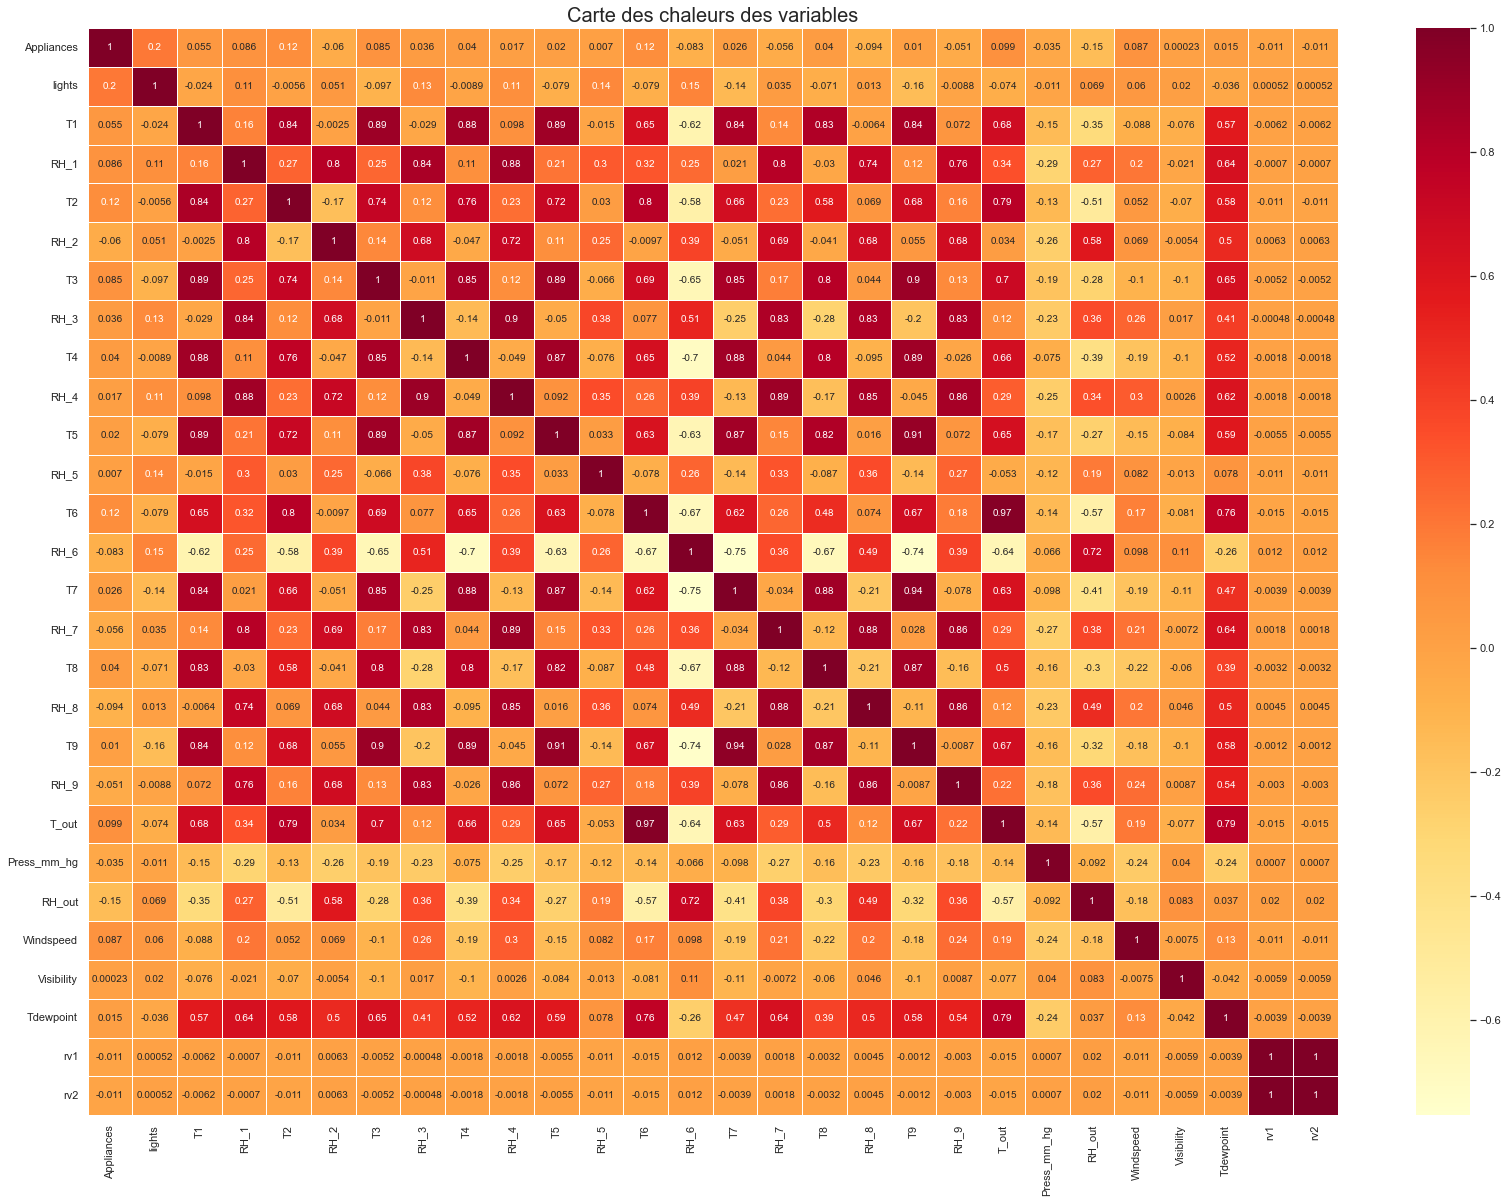

In [111]:
#Correlation:

fig = plt.figure(figsize=(28,20))

axis = sns.heatmap(df_Energy.corr(), cmap= 'YlOrRd', linewidth=1, linecolor='white', annot=True)
axis.set_title('Carte des chaleurs des variables', fontsize=20)

# 3- Feature selection :

Pour la sélection des fonctionnalités, nous mettons en œuvre l'élimination à l'aide d'une corrélation soutenue par l'intuition métier.

In [112]:
corr_matrix = df_Energy.corr().abs()

#the matrix is symmetric so we need to extract upper triangle matrix without diagonal (k = 1)

sol = (corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(np.bool))
                 .stack()
                 .sort_values(ascending=False))
sol = sol.to_frame()
sol.columns=['corr']
sol[sol['corr'] >  0.88]

,,corr
rv1,rv2,1.000000
T6,T_out,0.974787
T7,T9,0.944776
T5,T9,0.911055
T3,T9,0.901324
RH_3,RH_4,0.898978
RH_4,RH_7,0.894301
T1,T3,0.892402
T4,T9,0.889439
T3,T5,0.888169


In [113]:
df_Energy.columns

Index(['date', 'Appliances', 'lights', 'T1', 'RH_1', 'T2', 'RH_2', 'T3',
       'RH_3', 'T4', 'RH_4', 'T5', 'RH_5', 'T6', 'RH_6', 'T7', 'RH_7', 'T8',
       'RH_8', 'T9', 'RH_9', 'T_out', 'Press_mm_hg', 'RH_out', 'Windspeed',
       'Visibility', 'Tdewpoint', 'rv1', 'rv2'],
      dtype='object')

Vous trouverez ci-dessous les 10 caractéristiques finales ainsi que la variable cible "Appliances" que nous avons sélectionnées pour l'analyse ultérieure.

In [114]:
df_final = df_Energy[['T1', 
                     'T2', 
                     'RH_1', 
                     'RH_2',
                     'RH_6', 
                     'T_out',
                     'lights',
                     'Windspeed',
                     'RH_out', 
                     'Appliances',
                     'Press_mm_hg',
                     'rv1',
                     'Tdewpoint']]

df_final['Appliances_Energy'] = np.where(df_final['Appliances']>= 60, 1, 0)
df_final.drop(columns=['Appliances'],axis=1,inplace=True)

In [115]:
df_final.head()

,T1,T2,RH_1,RH_2,RH_6,T_out,lights,Windspeed,RH_out,Press_mm_hg,rv1,Tdewpoint,Appliances_Energy
0,19.89,19.2,47.596667,44.790000,84.256667,6.600000,30,7.000000,92.0,733.5,13.275433,5.3,1
1,19.89,19.2,46.693333,44.722500,84.063333,6.483333,30,6.666667,92.0,733.6,18.606195,5.2,1
2,19.89,19.2,46.300000,44.626667,83.156667,6.366667,30,6.333333,92.0,733.7,28.642668,5.1,0
3,19.89,19.2,46.066667,44.590000,83.423333,6.250000,40,6.000000,92.0,733.8,45.410389,5.0,0
4,19.89,19.2,46.333333,44.530000,84.893333,6.133333,40,5.666667,92.0,733.9,10.084097,4.9,1


# 4- L'algorithme adopté :

Dans l'apprentissage automatique , le noyau de fonction de base radiale , ou noyau RBF , est une fonction de noyau populaire utilisée dans divers algorithmes d'apprentissage noyaux. En particulier, il est couramment utilisé dans la classification des machines à vecteurs de support .

Ici on a choisi de travailler avec les machines à vecteurs de support, ou support vector machine (SVM), qui sont des modèles de machine learning supervisés centrés sur la résolution de problèmes de discrimination et de régression mathématiques.

Voici notre carte des chaleurs finale variables que nous allons utiliser avec le modèle [SVM, Decision Tress and Boosting].

Text(0.5, 1.0, 'Carte des chaleurs des variables')

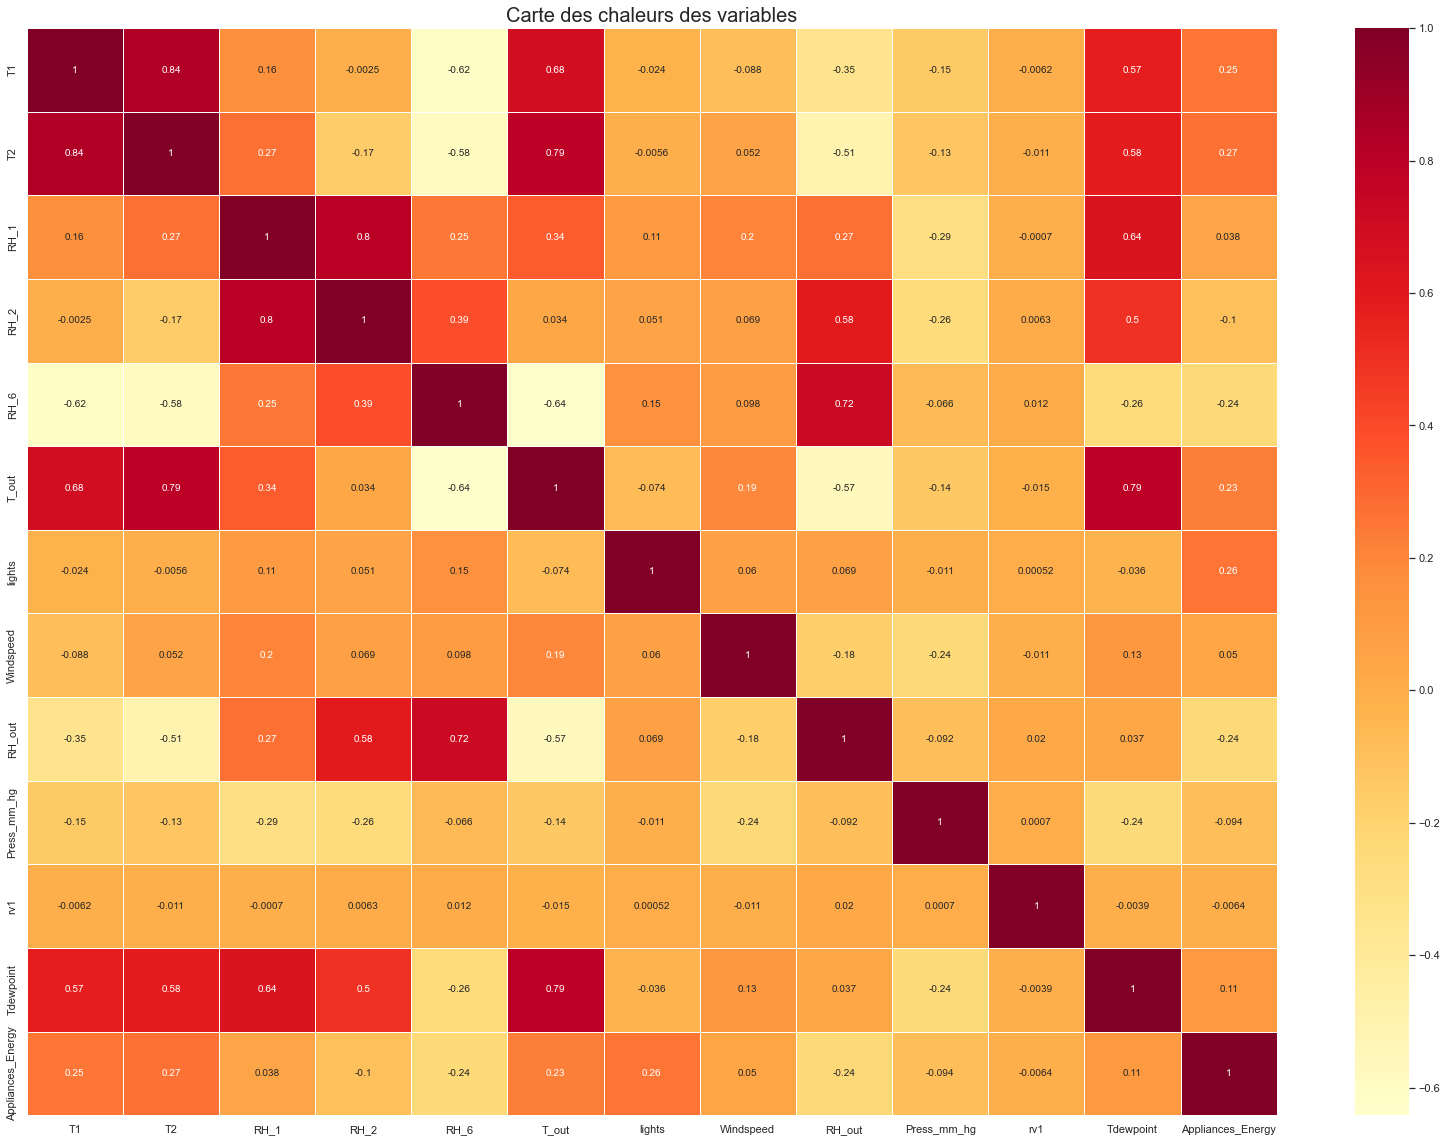

In [116]:
fig = plt.figure(figsize=(28,20))

axis = sns.heatmap(df_final.corr(), cmap= 'YlOrRd', linewidth=1, linecolor='white', annot=True)
axis.set_title('Carte des chaleurs des variables', fontsize=20)

# 5- Train Test Split :

On divise les données comme suit : 70% pour l'entrainement et on laisse 30% pour le test.

In [117]:
x = df_final.drop(columns=['Appliances_Energy'],axis=1)

y = df_final[['Appliances_Energy']]

xTrain, xTest, yTrain, yTest = train_test_split(x,y, test_size = 0.3, random_state = 0)

In [118]:
print('Shape of xTrain Set', xTrain.shape)
print('Shape of yTrain Set', yTrain.shape)

print('')

print('Shape of xTest Set', xTest.shape)
print('Shape of yTest Set', yTest.shape)

Shape of xTrain Set (13814, 12)
Shape of yTrain Set (13814, 1)

Shape of xTest Set (5921, 12)
Shape of yTest Set (5921, 1)


# 6- Cross-Validation Split :

La  technique  dite  "k-fold  cross-validation",  permet  de  diviser  la  base  des  exemples  d’apprentissage  en  k  échantillons.  Dans  le  cas  simple  les  échantillons  de  même  taille.  k-1  groupements  sont  utilisés  et  le  dernier  groupe  pour  l’évaluation.  Cette  procédure  est  répétée  pour  tous  les  autres  groupes,  la  performance est la moyenne des k scores.

In [119]:
cv=KFold(n_splits=10)

for train_index, test_index in cv.split(x):
    xTrain_cv,xTest_cv=x.iloc[train_index],x.iloc[test_index]
    yTrain_cv,yTest_cv=y.iloc[train_index],y.iloc[test_index]
    
print('Shape of xTrain Set', xTrain_cv.shape)
print('Shape of yTrain Set', yTrain_cv.shape)

print('')

print('Shape of xTest Set', xTest_cv.shape)
print('Shape of yTest Set', yTest_cv.shape)

Shape of xTrain Set (17762, 12)
Shape of yTrain Set (17762, 1)

Shape of xTest Set (1973, 12)
Shape of yTest Set (1973, 1)


Jetons un coup d'œil au décompte des classes pour vérifier la balance :

<AxesSubplot:xlabel='Appliances_Energy', ylabel='count'>

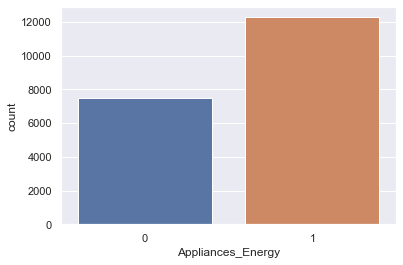

In [120]:
sns.countplot(df_final['Appliances_Energy'])

# 7- SVM :

Ici on veut créer une fonction pour prendre le noyau en entrée et exécuter le modèle et fournir des métriques pour tout type de SVM.

On va effectuer une comparaison entre les différents noyaux :
1- Linéaire.
2- RBF : qui est demandé dans cette application.
3- Sigmoid.

Et on va afficher par la suite des résultats pour le train-test split et le cross-validation pour chaque kernel des kernels suivants.

In [121]:
def runModelSVM(k,xTrain,yTrain,xTest,yTest):
    
    svc_clf = SVC(kernel=k)
    svc_clf.fit(xTrain,yTrain)
    y_pred=svc_clf.predict(xTest)

    print(' Kernel: ',k)
    print('Train score: {:.4f} %'.format(svc_clf.score(xTrain, yTrain)*100))
    print('Test score: {:.4f} %'.format(svc_clf.score(xTest, yTest)*100))
    print('')
    print('Classification Report:')
    print(classification_report(yTest,y_pred))
    print('Confusion Matrix:')
    print(confusion_matrix(yTest,y_pred))

Linear kernel

In [123]:
print('********************** Result for Train-Test Split **********************\n')
runModelSVM('linear',xTrain,yTrain,xTest,yTest)
print('********************** Result for Cross-Validation **********************\n')
runModelSVM('linear',xTrain_cv,yTrain_cv,xTest_cv,yTest_cv)

********************** Result for Train-Test Split **********************

 Kernel:  linear
Train score: 70.5950 %
Test score: 70.0051 %

Classification Report:
              precision    recall  f1-score   support

           0       0.60      0.55      0.58      2192
           1       0.75      0.79      0.77      3729

    accuracy                           0.70      5921
   macro avg       0.68      0.67      0.67      5921
weighted avg       0.70      0.70      0.70      5921

Confusion Matrix:
[[1204  988]
 [ 788 2941]]
********************** Result for Cross-Validation **********************

 Kernel:  linear
Train score: 69.8514 %
Test score: 73.2894 %

Classification Report:
              precision    recall  f1-score   support

           0       0.50      0.03      0.06       527
           1       0.74      0.99      0.84      1446

    accuracy                           0.73      1973
   macro avg       0.62      0.51      0.45      1973
weighted avg       0.67      0.73 

RBF Kernel

In [124]:
print('********************** Result for Train-Test Split **********************\n')
runModelSVM('rbf',xTrain,yTrain,xTest,yTest)
print('********************** Result for Cross-Validation **********************\n')
runModelSVM('rbf',xTrain_cv,yTrain_cv,xTest_cv,yTest_cv)

********************** Result for Train-Test Split **********************

 Kernel:  rbf
Train score: 67.9238 %
Test score: 68.1135 %

Classification Report:
              precision    recall  f1-score   support

           0       0.65      0.30      0.41      2192
           1       0.69      0.91      0.78      3729

    accuracy                           0.68      5921
   macro avg       0.67      0.60      0.59      5921
weighted avg       0.67      0.68      0.64      5921

Confusion Matrix:
[[ 651 1541]
 [ 347 3382]]
********************** Result for Cross-Validation **********************

 Kernel:  rbf
Train score: 67.8921 %
Test score: 73.2894 %

Classification Report:
              precision    recall  f1-score   support

           0       0.00      0.00      0.00       527
           1       0.73      1.00      0.85      1446

    accuracy                           0.73      1973
   macro avg       0.37      0.50      0.42      1973
weighted avg       0.54      0.73      0

Sigmoid Kernel

In [125]:
print('********************** Result for Train-Test Split **********************\n')
runModelSVM('sigmoid',xTrain,yTrain,xTest,yTest)
print('********************** Result for Cross-Validation **********************\n')
runModelSVM('sigmoid',xTrain_cv,yTrain_cv,xTest_cv,yTest_cv)

********************** Result for Train-Test Split **********************

 Kernel:  sigmoid
Train score: 61.8503 %
Test score: 62.9792 %

Classification Report:
              precision    recall  f1-score   support

           0       0.00      0.00      0.00      2192
           1       0.63      1.00      0.77      3729

    accuracy                           0.63      5921
   macro avg       0.31      0.50      0.39      5921
weighted avg       0.40      0.63      0.49      5921

Confusion Matrix:
[[   0 2192]
 [   0 3729]]
********************** Result for Cross-Validation **********************

 Kernel:  sigmoid
Train score: 60.9560 %
Test score: 73.2894 %

Classification Report:
              precision    recall  f1-score   support

           0       0.00      0.00      0.00       527
           1       0.73      1.00      0.85      1446

    accuracy                           0.73      1973
   macro avg       0.37      0.50      0.42      1973
weighted avg       0.54      0.7

# 8- Decision Trees :
Pour le Train-Test Split.
Full Length Tree :

In [126]:
from sklearn.tree import DecisionTreeClassifier

dtree=DecisionTreeClassifier(criterion='gini')

dtree.fit(xTrain,yTrain)
y_pred=dtree.predict(xTest)

print('Train score: {:.4f} %'.format(dtree.score(xTrain,yTrain)*100))
print('Test score: {:.4f} %'.format(dtree.score(xTest, yTest)*100))

Train score: 100.0000 %
Test score: 76.9971 %


Expérimentation de la taille.
Tailler pour éviter le surajustement.

L'élagage nous aide à éviter le surajustement.

Généralement, il est préférable d'avoir un modèle simple, cela évite les problèmes de surajustement. Toute division supplémentaire qui n'ajoute pas de valeur significative n'en vaut pas la peine. Nous pouvons éviter le surajustement en modifiant les paramètres comme :

max_leaf_nodes
min_samples_leaf
profondeur max
Paramètres d'élagage
max_leaf_nodes : réduire le nombre de nœuds feuilles.
min_samples_leaf : limite la taille de la feuille d'échantillon.
La taille minimale de l'échantillon dans les nœuds terminaux peut être fixée à 30, 100, 300 ou 5 % du total max_depth.
Réduire la profondeur de l'arbre pour construire un arbre généralisé Régler la profondeur de l'arbre à 3, 5, 10 selon après vérification sur les données de test.

In [127]:
from sklearn.tree import DecisionTreeClassifier
best_score=0

for n in range(1,20):
    for m in [10,15,20,25,30,35,40,50]:
        for l in range(2,30):
            dtree = DecisionTreeClassifier(criterion = 'gini', max_depth=n,max_leaf_nodes=l,min_samples_leaf=m)
            dtree.fit(xTrain,yTrain)
            score=dtree.score(xTest,yTest)
            if(score>best_score):
                best_score=score
                best_parameters={'max_depth':n,'min_samples_leaf':m,'max_leaf_nodes':l}

print(best_parameters)

{'max_depth': 10, 'min_samples_leaf': 10, 'max_leaf_nodes': 27}


In [128]:
d_tree=DecisionTreeClassifier(max_depth=9,criterion='gini',min_samples_leaf=10,max_leaf_nodes=27)

d_tree.fit(xTrain,yTrain)
y_pred=d_tree.predict(xTest)

print('Train score: {:.4f} %'.format(d_tree.score(xTrain,yTrain)*100))
print('Test score: {:.4f} %'.format(d_tree.score(xTest, yTest)*100))

print('Classification Report:')
print(classification_report(yTest,y_pred))
print('Confusion Matrix:')
print(confusion_matrix(yTest,y_pred))

Train score: 74.3304 %
Test score: 72.6229 %
Classification Report:
              precision    recall  f1-score   support

           0       0.67      0.52      0.58      2192
           1       0.75      0.85      0.80      3729

    accuracy                           0.73      5921
   macro avg       0.71      0.68      0.69      5921
weighted avg       0.72      0.73      0.72      5921

Confusion Matrix:
[[1133 1059]
 [ 562 3167]]


In [129]:
from pprint import pprint
pprint(dtree.get_params())

{'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': 19,
 'max_features': None,
 'max_leaf_nodes': 29,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 50,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'random_state': None,
 'splitter': 'best'}


Ici on affiche la courbe d'apprentissage par rapport à la profondeur maximale :

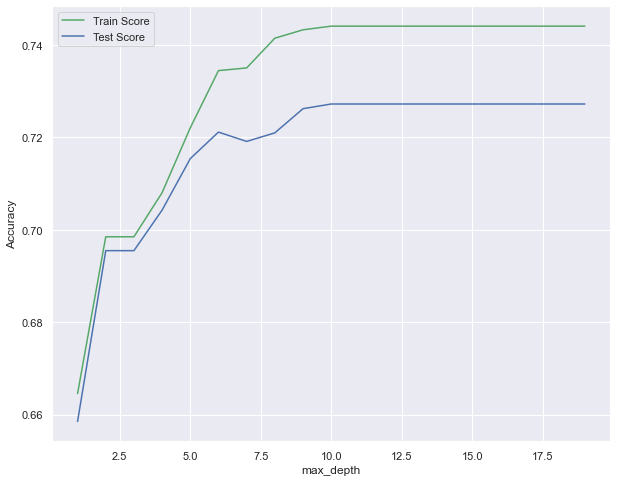

In [130]:
from sklearn.tree import DecisionTreeClassifier

sns.set(rc={'figure.figsize':(10,8)})

train_score_array = []
test_score_array = []

for n in range(1,20):
            dtree = DecisionTreeClassifier(criterion = 'gini', max_depth=n,min_samples_leaf=10,max_leaf_nodes=27)
            dtree.fit(xTrain,yTrain)
            train_score_array.append(dtree.score(xTrain,yTrain))
            test_score_array.append(dtree.score(xTest, yTest))

x_axis = range(1,20)
plt.plot(x_axis, train_score_array, label = 'Train Score', c = 'g')
plt.plot(x_axis, test_score_array, label = 'Test Score', c='b')
plt.xlabel('max_depth')
plt.ylabel('Accuracy')
plt.legend()

Ici on affiche la courbe d'apprentissage par rapport à Max Leaf Nodes.

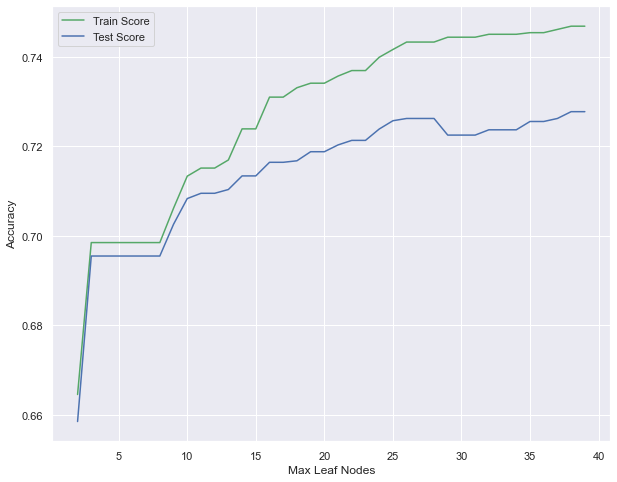

In [131]:
from sklearn.tree import DecisionTreeClassifier

sns.set(rc={'figure.figsize':(10,8)})

train_score_array = []
test_score_array = []

for n in range(2,40):
            dtree = DecisionTreeClassifier(criterion = 'gini', max_depth=9,min_samples_leaf=10,max_leaf_nodes=n)
            dtree.fit(xTrain,yTrain)
            train_score_array.append(dtree.score(xTrain,yTrain))
            test_score_array.append(dtree.score(xTest, yTest))

x_axis = range(2,40)
plt.plot(x_axis, train_score_array, label = 'Train Score', c = 'g')
plt.plot(x_axis, test_score_array, label = 'Test Score', c='b')
plt.xlabel('Max Leaf Nodes')
plt.ylabel('Accuracy')
plt.legend()

Ici on affiche la courbe d'apprentissage par rapport à Min Samples Leaf.

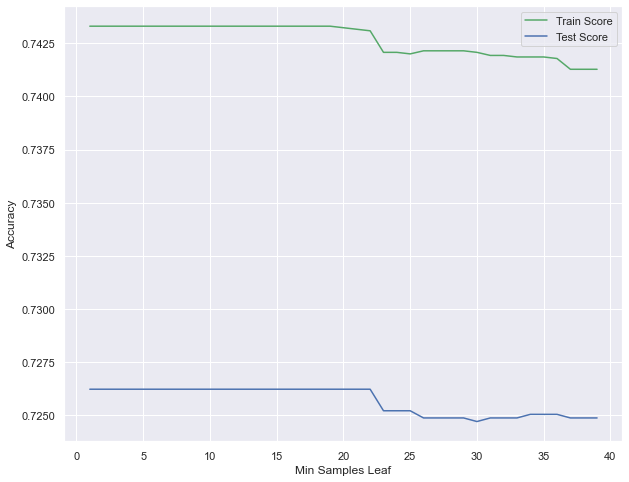

In [132]:
from sklearn.tree import DecisionTreeClassifier

sns.set(rc={'figure.figsize':(10,8)})

train_score_array = []
test_score_array = []

for n in range(1,40):
            dtree = DecisionTreeClassifier(criterion = 'gini', max_depth=9,min_samples_leaf=n,max_leaf_nodes=27)
            dtree.fit(xTrain,yTrain)
            train_score_array.append(dtree.score(xTrain,yTrain))
            test_score_array.append(dtree.score(xTest, yTest))

x_axis = range(1,40)
plt.plot(x_axis, train_score_array, label = 'Train Score', c = 'g')
plt.plot(x_axis, test_score_array, label = 'Test Score', c='b')
plt.xlabel('Min Samples Leaf')
plt.ylabel('Accuracy')
plt.legend()

Pour la Cross_Validation Split :
Full Length Tree :

In [133]:
from sklearn.tree import DecisionTreeClassifier

dtree_cv=DecisionTreeClassifier(criterion='gini')

dtree_cv.fit(xTrain_cv,yTrain_cv)
y_pred_cv=dtree_cv.predict(xTest_cv)

print('Train score: {:.4f} %'.format(dtree_cv.score(xTrain_cv,yTrain_cv)*100))
print('Test score: {:.4f} %'.format(dtree_cv.score(xTest_cv, yTest_cv)*100))

Train score: 100.0000 %
Test score: 65.6361 %


Expérimentation de la taille.
Tailler pour éviter le surajustement.

L'élagage nous aide à éviter le surajustement.

Généralement, il est préférable d'avoir un modèle simple, cela évite les problèmes de surajustement. Toute division supplémentaire qui n'ajoute pas de valeur significative n'en vaut pas la peine. Nous pouvons éviter le surajustement en modifiant les paramètres comme :

max_leaf_nodes
min_samples_leaf
profondeur max
Paramètres d'élagage
max_leaf_nodes : réduire le nombre de nœuds feuilles.
min_samples_leaf : limite la taille de la feuille d'échantillon.
La taille minimale de l'échantillon dans les nœuds terminaux peut être fixée à 30, 100, 300 ou 5 % du total max_depth
Réduire la profondeur de l'arbre pour construire un arbre généralisé Régler la profondeur de l'arbre à 3, 5, 10 selon après vérification sur les données de test.

In [134]:
from sklearn.tree import DecisionTreeClassifier
best_score=0

for n in range(1,20):
    for m in [10,15,20,25,30,35,40,50]:
        for l in range(2,30):
            dtree_cv = DecisionTreeClassifier(criterion = 'gini', max_depth=n,max_leaf_nodes=l,min_samples_leaf=m)
            dtree_cv.fit(xTrain_cv,yTrain_cv)
            score=dtree_cv.score(xTest_cv,yTest_cv)
            if(score>best_score):
                best_score=score
                best_parameters={'max_depth':n,'min_samples_leaf':m,'max_leaf_nodes':l}

print(best_parameters)

{'max_depth': 6, 'min_samples_leaf': 10, 'max_leaf_nodes': 28}


In [135]:
dtree_cv=DecisionTreeClassifier(max_depth=5,criterion='gini',min_samples_leaf=10,max_leaf_nodes=28)

dtree_cv.fit(xTrain_cv,yTrain_cv)
y_pred_cv=dtree_cv.predict(xTest_cv)

print('Train score: {:.4f} %'.format(dtree_cv.score(xTrain_cv,yTrain_cv)*100))
print('Test score: {:.4f} %'.format(dtree_cv.score(xTest_cv, yTest_cv)*100))

print('Classification Report:')
print(classification_report(yTest_cv,y_pred_cv))
print('Confusion Matrix:')
print(confusion_matrix(yTest_cv,y_pred_cv))

Train score: 72.7564 %
Test score: 73.1374 %
Classification Report:
              precision    recall  f1-score   support

           0       0.29      0.00      0.01       527
           1       0.73      1.00      0.84      1446

    accuracy                           0.73      1973
   macro avg       0.51      0.50      0.43      1973
weighted avg       0.61      0.73      0.62      1973

Confusion Matrix:
[[   2  525]
 [   5 1441]]


In [136]:
from pprint import pprint
pprint(dtree_cv.get_params())

{'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': 5,
 'max_features': None,
 'max_leaf_nodes': 28,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 10,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'random_state': None,
 'splitter': 'best'}


Ici on affiche la courbe d'apprentissage avec respect to  Max depth :

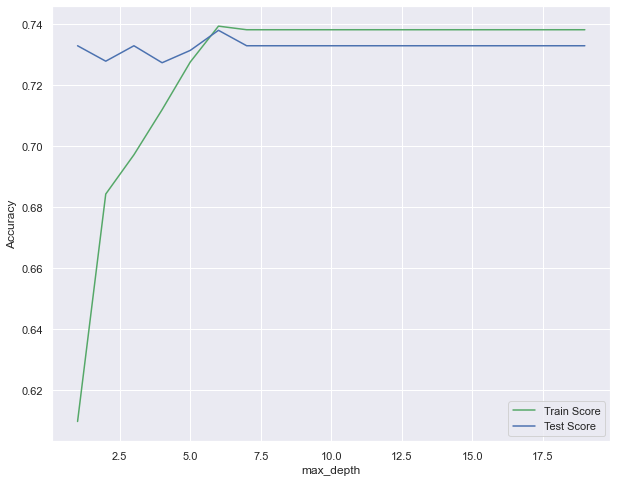

In [137]:
from sklearn.tree import DecisionTreeClassifier

sns.set(rc={'figure.figsize':(10,8)})

train_score_array = []
test_score_array = []

for n in range(1,20):
            dtree_cv = DecisionTreeClassifier(criterion = 'gini', max_depth=n,min_samples_leaf=10,max_leaf_nodes=28)
            dtree_cv.fit(xTrain_cv,yTrain_cv)
            train_score_array.append(dtree_cv.score(xTrain_cv,yTrain_cv))
            test_score_array.append(dtree_cv.score(xTest_cv, yTest_cv))

x_axis = range(1,20)
plt.plot(x_axis, train_score_array, label = 'Train Score', c = 'g')
plt.plot(x_axis, test_score_array, label = 'Test Score', c='b')
plt.xlabel('max_depth')
plt.ylabel('Accuracy')
plt.legend()

Ici on affiche la courbe d'apprentissage avec respect to Max Leaf Nodes :

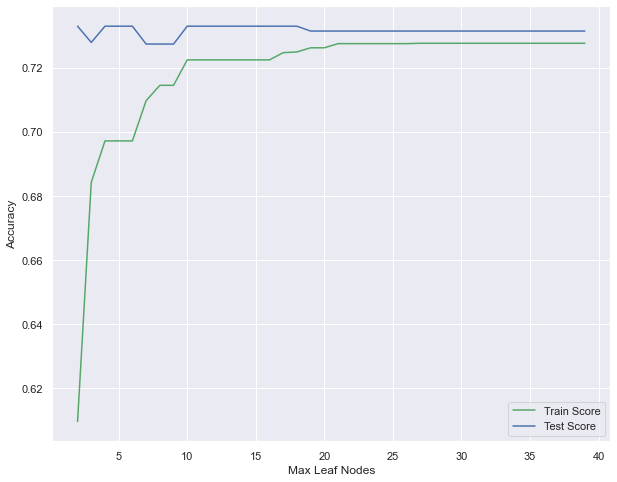

In [138]:
from sklearn.tree import DecisionTreeClassifier

sns.set(rc={'figure.figsize':(10,8)})

train_score_array = []
test_score_array = []

for n in range(2,40):
            dtree_cv = DecisionTreeClassifier(criterion = 'gini', max_depth=5,min_samples_leaf=10,max_leaf_nodes=n)
            dtree_cv.fit(xTrain_cv,yTrain_cv)
            train_score_array.append(dtree_cv.score(xTrain_cv,yTrain_cv))
            test_score_array.append(dtree_cv.score(xTest_cv, yTest_cv))

x_axis = range(2,40)
plt.plot(x_axis, train_score_array, label = 'Train Score', c = 'g')
plt.plot(x_axis, test_score_array, label = 'Test Score', c='b')
plt.xlabel('Max Leaf Nodes')
plt.ylabel('Accuracy')
plt.legend()

Ici on affiche la courbe d'apprentissage avec respect to Min Samples Leaf :

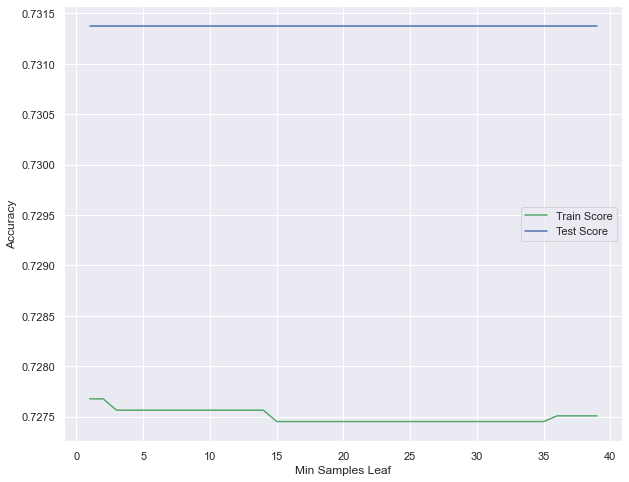

In [139]:
from sklearn.tree import DecisionTreeClassifier

sns.set(rc={'figure.figsize':(10,8)})

train_score_array = []
test_score_array = []

for n in range(1,40):
            dtree_cv = DecisionTreeClassifier(criterion = 'gini', max_depth=5,min_samples_leaf=n,max_leaf_nodes=28)
            dtree_cv.fit(xTrain_cv,yTrain_cv)
            train_score_array.append(dtree_cv.score(xTrain_cv,yTrain_cv))
            test_score_array.append(dtree_cv.score(xTest_cv, yTest_cv))

x_axis = range(1,40)
plt.plot(x_axis, train_score_array, label = 'Train Score', c = 'g')
plt.plot(x_axis, test_score_array, label = 'Test Score', c='b')
plt.xlabel('Min Samples Leaf')
plt.ylabel('Accuracy')
plt.legend()

# 9- Boosting :

For Train-Test-Split :

In [140]:
from xgboost import XGBClassifier
xgb = XGBClassifier()

xgb.fit(xTrain,yTrain)
y_pred=xgb.predict(xTest)

print('Train score: {:.4f} %'.format(xgb.score(xTrain,yTrain)*100))
print('Test score: {:.4f} %'.format(xgb.score(xTest, yTest)*100))

[11:24:52] WARNING: ..\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
Train score: 91.9792 %
Test score: 80.9154 %


In [141]:
pprint(xgb.get_params())

{'base_score': 0.5,
 'booster': 'gbtree',
 'colsample_bylevel': 1,
 'colsample_bynode': 1,
 'colsample_bytree': 1,
 'enable_categorical': False,
 'gamma': 0,
 'gpu_id': -1,
 'importance_type': None,
 'interaction_constraints': '',
 'learning_rate': 0.300000012,
 'max_delta_step': 0,
 'max_depth': 6,
 'min_child_weight': 1,
 'missing': nan,
 'monotone_constraints': '()',
 'n_estimators': 100,
 'n_jobs': 4,
 'num_parallel_tree': 1,
 'objective': 'binary:logistic',
 'predictor': 'auto',
 'random_state': 0,
 'reg_alpha': 0,
 'reg_lambda': 1,
 'scale_pos_weight': 1,
 'subsample': 1,
 'tree_method': 'exact',
 'use_label_encoder': True,
 'validate_parameters': 1,
 'verbosity': None}


Experimentation avec Pruning pour XGBoost:

In [142]:
best_score=0

for n in [0.001,0.01,0.1,1,10,100]:
    for m in [50,100,150,200]:
        for l in range(1,10):
            xgb = XGBClassifier(learning_rate=n,n_estimators=m,max_depth=l)
            xgb.fit(xTrain,yTrain)
            score=xgb.score(xTest, yTest)
            if(score>best_score):
                best_score=score
                best_parameters = {'learning_rate': n,'n_estimators':m,'max_depth':l}

print(best_parameters)

[11:24:55] WARNING: ..\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[11:24:55] WARNING: ..\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[11:24:55] WARNING: ..\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[11:24:56] WARNING: ..\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old be

[11:25:52] WARNING: ..\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[11:25:56] WARNING: ..\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[11:26:01] WARNING: ..\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[11:26:07] WARNING: ..\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old be

[11:26:51] WARNING: ..\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[11:26:53] WARNING: ..\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[11:26:56] WARNING: ..\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[11:26:59] WARNING: ..\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old be

[11:28:02] WARNING: ..\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[11:28:03] WARNING: ..\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[11:28:04] WARNING: ..\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[11:28:06] WARNING: ..\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old be

[11:29:02] WARNING: ..\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[11:29:05] WARNING: ..\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[11:29:08] WARNING: ..\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[11:29:12] WARNING: ..\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old be

[11:29:45] WARNING: ..\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[11:29:46] WARNING: ..\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[11:29:46] WARNING: ..\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[11:29:47] WARNING: ..\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old be

[11:29:57] WARNING: ..\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[11:29:58] WARNING: ..\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[11:29:58] WARNING: ..\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[11:29:58] WARNING: ..\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old be

In [143]:
xgb=XGBClassifier(max_depth=8,n_estimators=200,learning_rate=0.1)

xgb.fit(xTrain,yTrain)
y_pred=xgb.predict(xTest)

print('Train score: {:.4f} %'.format(xgb.score(xTrain,yTrain)*100))
print('Test score: {:.4f} %'.format(xgb.score(xTest, yTest)*100))

print('Classification Report:')
print(classification_report(yTest,y_pred))
print('Confusion Matrix:')
print(confusion_matrix(yTest,y_pred))

[11:30:05] WARNING: ..\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
Train score: 94.7083 %
Test score: 81.0505 %
Classification Report:
              precision    recall  f1-score   support

           0       0.76      0.72      0.74      2192
           1       0.84      0.86      0.85      3729

    accuracy                           0.81      5921
   macro avg       0.80      0.79      0.79      5921
weighted avg       0.81      0.81      0.81      5921

Confusion Matrix:
[[1576  616]
 [ 506 3223]]


In [144]:
from pprint import pprint
pprint(xgb.get_params())

{'base_score': 0.5,
 'booster': 'gbtree',
 'colsample_bylevel': 1,
 'colsample_bynode': 1,
 'colsample_bytree': 1,
 'enable_categorical': False,
 'gamma': 0,
 'gpu_id': -1,
 'importance_type': None,
 'interaction_constraints': '',
 'learning_rate': 0.1,
 'max_delta_step': 0,
 'max_depth': 8,
 'min_child_weight': 1,
 'missing': nan,
 'monotone_constraints': '()',
 'n_estimators': 200,
 'n_jobs': 4,
 'num_parallel_tree': 1,
 'objective': 'binary:logistic',
 'predictor': 'auto',
 'random_state': 0,
 'reg_alpha': 0,
 'reg_lambda': 1,
 'scale_pos_weight': 1,
 'subsample': 1,
 'tree_method': 'exact',
 'use_label_encoder': True,
 'validate_parameters': 1,
 'verbosity': None}


Ici on affiche la courbe d'apprentissage avec respect to learning rate :

[11:30:09] WARNING: ..\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[11:30:14] WARNING: ..\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[11:30:20] WARNING: ..\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[11:30:24] WARNING: ..\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old be

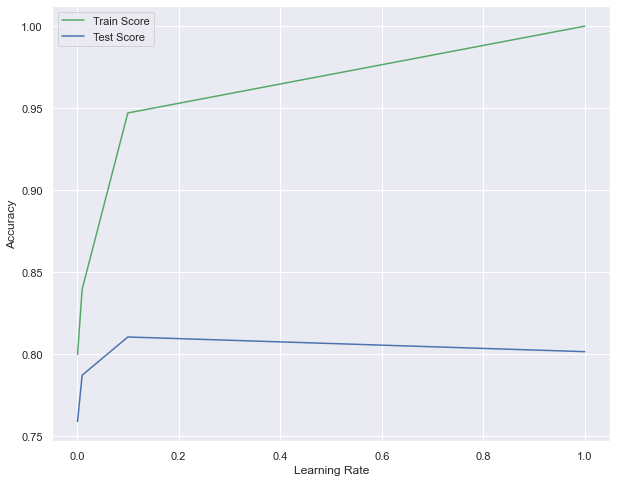

In [145]:
sns.set(rc={'figure.figsize':(10,8)})

train_score_array = []
test_score_array = []

for n in [0.001,0.01,0.1,1]:
            xgb = XGBClassifier( max_depth=8,learning_rate=n,n_estimators=200)
            xgb.fit(xTrain,yTrain)
            train_score_array.append(xgb.score(xTrain,yTrain))
            test_score_array.append(xgb.score(xTest, yTest))

x_axis = [0.001,0.01,0.1,1]
plt.plot(x_axis, train_score_array, label = 'Train Score', c = 'g')
plt.plot(x_axis, test_score_array, label = 'Test Score', c='b')
plt.xlabel('Learning Rate')
plt.ylabel('Accuracy')
plt.legend()

Ici on affiche la courbe d'apprentissage avec respect to max_depth :

[11:30:30] WARNING: ..\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[11:30:31] WARNING: ..\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[11:30:32] WARNING: ..\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[11:30:34] WARNING: ..\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old be

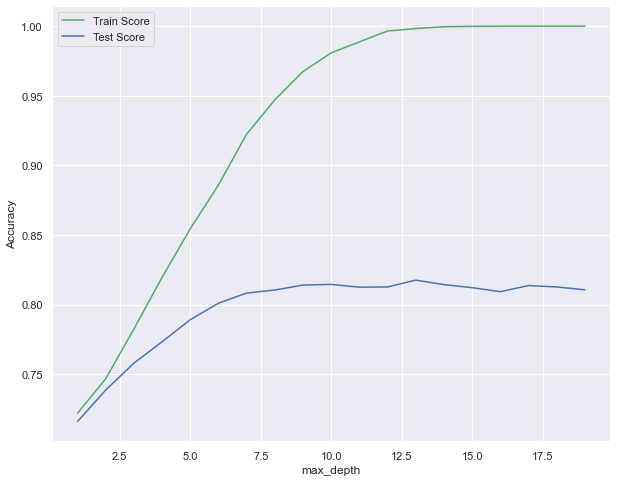

In [146]:
sns.set(rc={'figure.figsize':(10,8)})

train_score_array = []
test_score_array = []

for n in range(1,20):
            xgb = XGBClassifier( max_depth=n,learning_rate=0.1,n_estimators=200)
            xgb.fit(xTrain,yTrain)
            train_score_array.append(xgb.score(xTrain,yTrain))
            test_score_array.append(xgb.score(xTest, yTest))

x_axis = range(1,20)
plt.plot(x_axis, train_score_array, label = 'Train Score', c = 'g')
plt.plot(x_axis, test_score_array, label = 'Test Score', c='b')
plt.xlabel('max_depth')
plt.ylabel('Accuracy')
plt.legend()

Ici on affiche la courbe d'apprentissage avec respect to n-estimators :

[11:32:28] WARNING: ..\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[11:32:30] WARNING: ..\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[11:32:32] WARNING: ..\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[11:32:35] WARNING: ..\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old be

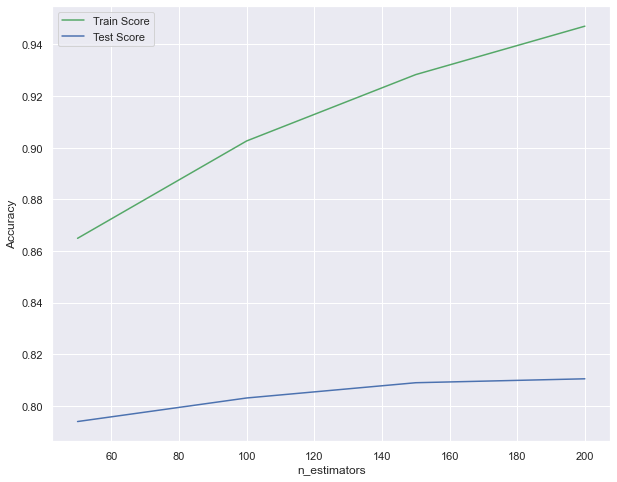

In [147]:
sns.set(rc={'figure.figsize':(10,8)})

train_score_array = []
test_score_array = []

for n in [50,100,150,200]:
            xgb = XGBClassifier( max_depth=8,learning_rate=0.1,n_estimators=n)
            xgb.fit(xTrain,yTrain)
            train_score_array.append(xgb.score(xTrain,yTrain))
            test_score_array.append(xgb.score(xTest, yTest))

x_axis = [50,100,150,200]
plt.plot(x_axis, train_score_array, label = 'Train Score', c = 'g')
plt.plot(x_axis, test_score_array, label = 'Test Score', c='b')
plt.xlabel('n_estimators')
plt.ylabel('Accuracy')
plt.legend()

Pour la Cross-Validation :

In [148]:
from xgboost import XGBClassifier
xgb_cv = XGBClassifier()

xgb_cv.fit(xTrain_cv,yTrain_cv)
y_pred_cv=xgb_cv.predict(xTest_cv)

print('Train score: {:.4f} %'.format(xgb_cv.score(xTrain_cv,yTrain_cv)*100))
print('Test score: {:.4f} %'.format(xgb_cv.score(xTest_cv, yTest_cv)*100))

[11:32:40] WARNING: ..\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
Train score: 91.3748 %
Test score: 72.3264 %


In [149]:
pprint(xgb_cv.get_params())

{'base_score': 0.5,
 'booster': 'gbtree',
 'colsample_bylevel': 1,
 'colsample_bynode': 1,
 'colsample_bytree': 1,
 'enable_categorical': False,
 'gamma': 0,
 'gpu_id': -1,
 'importance_type': None,
 'interaction_constraints': '',
 'learning_rate': 0.300000012,
 'max_delta_step': 0,
 'max_depth': 6,
 'min_child_weight': 1,
 'missing': nan,
 'monotone_constraints': '()',
 'n_estimators': 100,
 'n_jobs': 4,
 'num_parallel_tree': 1,
 'objective': 'binary:logistic',
 'predictor': 'auto',
 'random_state': 0,
 'reg_alpha': 0,
 'reg_lambda': 1,
 'scale_pos_weight': 1,
 'subsample': 1,
 'tree_method': 'exact',
 'use_label_encoder': True,
 'validate_parameters': 1,
 'verbosity': None}


Experimentation avec Pruning pour XGBoost:

In [150]:
best_score=0

for n in [0.001,0.01,0.1,1,10,100]:
    for m in [50,100,150,200]:
        for l in range(1,10):
            xgb_cv = XGBClassifier(learning_rate=n,n_estimators=m,max_depth=l)
            xgb_cv.fit(xTrain_cv,yTrain_cv)
            score=xgb_cv.score(xTest_cv, yTest_cv)
            if(score>best_score):
                best_score=score
                best_parameters = {'learning_rate': n,'n_estimators':m,'max_depth':l}

print(best_parameters)

[11:32:42] WARNING: ..\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[11:32:42] WARNING: ..\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[11:32:43] WARNING: ..\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[11:32:43] WARNING: ..\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old be

[11:33:45] WARNING: ..\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[11:33:52] WARNING: ..\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[11:33:59] WARNING: ..\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[11:34:09] WARNING: ..\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old be

[11:35:12] WARNING: ..\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[11:35:15] WARNING: ..\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[11:35:20] WARNING: ..\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[11:35:24] WARNING: ..\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old be

[11:36:36] WARNING: ..\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[11:36:37] WARNING: ..\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[11:36:38] WARNING: ..\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[11:36:41] WARNING: ..\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old be

[11:38:02] WARNING: ..\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[11:38:08] WARNING: ..\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[11:38:12] WARNING: ..\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[11:38:19] WARNING: ..\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old be

[11:39:02] WARNING: ..\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[11:39:02] WARNING: ..\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[11:39:03] WARNING: ..\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[11:39:03] WARNING: ..\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old be

[11:39:15] WARNING: ..\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[11:39:16] WARNING: ..\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[11:39:16] WARNING: ..\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[11:39:17] WARNING: ..\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old be

In [151]:
xgb_cv=XGBClassifier(max_depth=3,n_estimators=50,learning_rate=1)

xgb_cv.fit(xTrain_cv,yTrain_cv)
y_pred_cv=xgb_cv.predict(xTest_cv)

print('Train score: {:.4f} %'.format(xgb_cv.score(xTrain_cv,yTrain_cv)*100))
print('Test score: {:.4f} %'.format(xgb_cv.score(xTest_cv, yTest_cv)*100))

print('Classification Report:')
print(classification_report(yTest_cv,y_pred_cv))
print('Confusion Matrix:')
print(confusion_matrix(yTest_cv,y_pred_cv))

[11:39:25] WARNING: ..\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
Train score: 81.9559 %
Test score: 73.6442 %
Classification Report:
              precision    recall  f1-score   support

           0       0.54      0.09      0.15       527
           1       0.75      0.97      0.84      1446

    accuracy                           0.74      1973
   macro avg       0.64      0.53      0.50      1973
weighted avg       0.69      0.74      0.66      1973

Confusion Matrix:
[[  46  481]
 [  39 1407]]


In [152]:
from pprint import pprint
pprint(xgb_cv.get_params())

{'base_score': 0.5,
 'booster': 'gbtree',
 'colsample_bylevel': 1,
 'colsample_bynode': 1,
 'colsample_bytree': 1,
 'enable_categorical': False,
 'gamma': 0,
 'gpu_id': -1,
 'importance_type': None,
 'interaction_constraints': '',
 'learning_rate': 1,
 'max_delta_step': 0,
 'max_depth': 3,
 'min_child_weight': 1,
 'missing': nan,
 'monotone_constraints': '()',
 'n_estimators': 50,
 'n_jobs': 4,
 'num_parallel_tree': 1,
 'objective': 'binary:logistic',
 'predictor': 'auto',
 'random_state': 0,
 'reg_alpha': 0,
 'reg_lambda': 1,
 'scale_pos_weight': 1,
 'subsample': 1,
 'tree_method': 'exact',
 'use_label_encoder': True,
 'validate_parameters': 1,
 'verbosity': None}


Ici on affiche la courbe d'apprentissage avec respect to learning rate :

[11:39:25] WARNING: ..\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[11:39:26] WARNING: ..\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[11:39:26] WARNING: ..\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[11:39:27] WARNING: ..\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old be

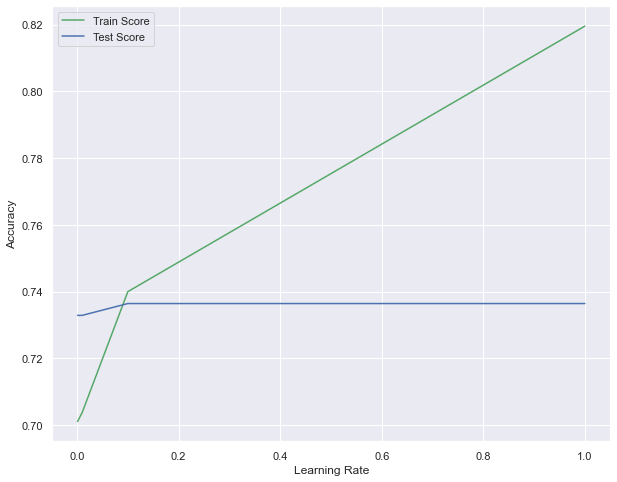

In [153]:
sns.set(rc={'figure.figsize':(10,8)})

train_score_array = []
test_score_array = []

for n in [0.001,0.01,0.1,1]:
            xgb_cv = XGBClassifier( max_depth=3,learning_rate=n,n_estimators=50)
            xgb_cv.fit(xTrain_cv,yTrain_cv)
            train_score_array.append(xgb_cv.score(xTrain_cv,yTrain_cv))
            test_score_array.append(xgb_cv.score(xTest_cv, yTest_cv))

x_axis = [0.001,0.01,0.1,1]
plt.plot(x_axis, train_score_array, label = 'Train Score', c = 'g')
plt.plot(x_axis, test_score_array, label = 'Test Score', c='b')
plt.xlabel('Learning Rate')
plt.ylabel('Accuracy')
plt.legend()

Ici on affiche la courbe d'apprentissage avec respect to max_depth :

[11:39:28] WARNING: ..\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[11:39:28] WARNING: ..\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[11:39:29] WARNING: ..\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[11:39:29] WARNING: ..\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old be

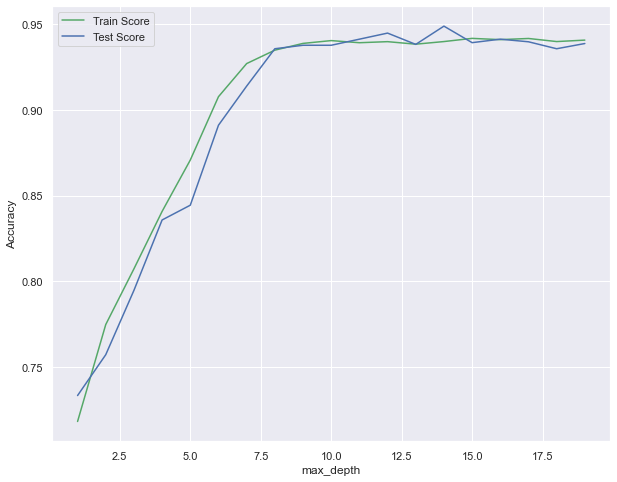

In [154]:
sns.set(rc={'figure.figsize':(10,8)})

train_score_array = []
test_score_array = []

for n in range(1,20):
            xgb_cv = XGBClassifier( max_depth=n,learning_rate=1,n_estimators=50)
            xgb_cv.fit(xTrain,yTrain)
            train_score_array.append(xgb_cv.score(xTrain_cv,yTrain_cv))
            test_score_array.append(xgb_cv.score(xTest_cv, yTest_cv))

x_axis = range(1,20)
plt.plot(x_axis, train_score_array, label = 'Train Score', c = 'g')
plt.plot(x_axis, test_score_array, label = 'Test Score', c='b')
plt.xlabel('max_depth')
plt.ylabel('Accuracy')
plt.legend()

Ici on affiche la courbe d'apprentissage avec respect to n-estimators :

[11:40:01] WARNING: ..\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[11:40:01] WARNING: ..\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[11:40:02] WARNING: ..\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[11:40:04] WARNING: ..\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old be

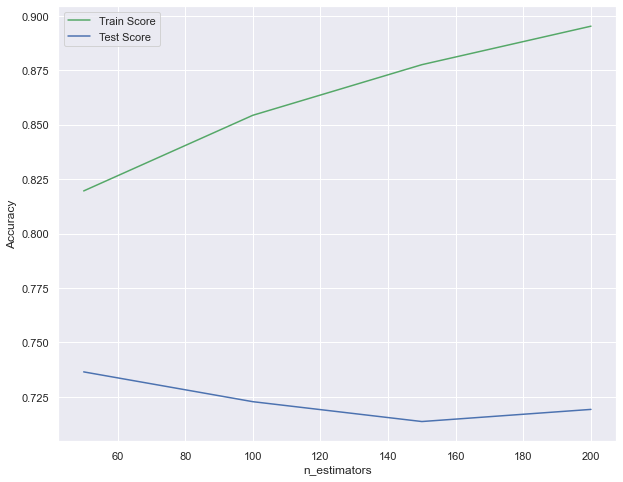

In [155]:
sns.set(rc={'figure.figsize':(10,8)})

train_score_array = []
test_score_array = []

for n in [50,100,150,200]:
            xgb_cv = XGBClassifier( max_depth=3,learning_rate=1,n_estimators=n)
            xgb_cv.fit(xTrain_cv,yTrain_cv)
            train_score_array.append(xgb_cv.score(xTrain_cv,yTrain_cv))
            test_score_array.append(xgb_cv.score(xTest_cv, yTest_cv))

x_axis = [50,100,150,200]
plt.plot(x_axis, train_score_array, label = 'Train Score', c = 'g')
plt.plot(x_axis, test_score_array, label = 'Test Score', c='b')
plt.xlabel('n_estimators')
plt.ylabel('Accuracy')
plt.legend()

# Autre solution :

Une autre approche pour résoudre ce problème concerne l'utilisation de l'algorithme de Kmeans et un kernel basé sur le RBF.

In [156]:
from sklearn.preprocessing import LabelBinarizer
from sklearn.preprocessing import scale

Ici on vient de définir la fonction RBF qui calcule les distances, et la fonction Kmeans qui implémente l'algrothme et qui prend en paramètre le kernel de RBF.

In [157]:
nbreClasses = 10
def rbf(x, c, s):
    distance=np.linalg.norm(np.array(x)-np.array(c))
    return 1/np.exp(-distance/(2*s**2))
    
def kmeans(X, k, itersmax=100): 
    
    clusters=X[np.random.choice(range(len(X)), k, replace=False)]
    converged=False
    
    iter=0
    while(not converged)and(iter<itersmax):  
        
        cluster_list=[[]for i in range(len(clusters))]
        for x in X:
            distances=[]
            for c in clusters:
                distances.append(np.linalg.norm(np.array(x)-np.array(c)))
            cluster_list[int(np.argmin(distances))].append(x)
            
        cluster_list=list((filter(None, cluster_list)))
        
        prevClusters=clusters.copy()
        clusters=[]
        
        for j in range(len(cluster_list)):
            clusters.append(np.mean(cluster_list[j], axis=0))
            
        diff=np.abs(np.sum(prevClusters)-np.sum(clusters))
        print('Test KMEANS :', diff)
        converged=(diff==0)
        
        iter+=1
        
    stds=[np.std(x) for x in cluster_list]
    return np.array(clusters), stds

# RBFNet :

On va clairement l'implémentation de la classe RBFNet, dont on définit 4 méthodes __init__() pour l'initialisation, rbf states, fit et predict pour la prédiction.

In [158]:
class RBFNet(object):
    
    def __init__(self, k=2, lr=0.01, epochs=100, rbf=rbf, withstds=True):
        self.k=k
        self.lr=lr
        self.epochs=epochs
        self.rbf=rbf
        self.withstds=withstds
        
        self.w=np.random.randn(nbreClasses,self.k)
        self.b=np.random.randn(nbreClasses)
        
    def rbf_states(self, X, clusters, stds):
        rbfs=[]
        for x in X:
            rbfs.append([rbf(x, c, s)for(c, s)in zip(clusters, stds)])
        return np.array(rbfs)
    
    def fit(self, X, y):
        self.centers,self.stds=kmeans(X,self.k, itersmax=100)
        
        if not self.withstds:
            dMax=np.max([np.linalg.norm(np.array(c1)-np.array(c2)) for c1 in self.centers for c2 in self.centers])
            self.stds=np.repeat(dMax/np.sqrt(2*self.k),self.k)
        
        epochsDisp=self.epochs//10
        
        for epoch in range(self.epochs):
            globalLoss=0;
            for i in range(X.shape[0]):
                a=np.array([rbf(X[i], c, s) for c, s in zip(self.centers,self.stds)])
                F=self.w.dot(a.T)+self.b
                loss=(y[i]-F)**2
                globalLoss=globalLoss+np.linalg.norm(loss)
                error=-(y[i]-F).flatten()
                self.w=self.w-self.lr*error.reshape(nbreClasses,1).dot(a.reshape(1,self.k))
                self.b=self.b-self.lr*error
                
            if epoch%epochsDisp== 0 :
                print(str(epoch),'RBF training : mean error :{0:.2f}'.format(globalLoss/X.shape[0]))
                
    def predict(self, X):
         y_pred=[]
         for i in range(X.shape[0]):
            a=np.array([rbf(X[i], c, s)for c, s in zip(self.centers,self.stds)])
            F=self.w.dot(a.T)+self.b
            y_pred.append(F)
         return np.array(y_pred)

Ici on exploite l'algorithme Kmeans qui utilise le kernel RBF sur les données de consommation d'énergie qu'on a déjà préparé :

In [159]:
rbfnet=RBFNet(lr=0.01, k=30, epochs=200, withstds='true')

n12 = np.squeeze(np.asarray(xTrain))
n13 = np.squeeze(np.asarray(yTrain))

    
rbfnet.fit(n12, n13)

Test KMEANS : 73.6436680028819
Test KMEANS : 29.930038697639247
Test KMEANS : 22.7511403670469
Test KMEANS : 12.299951349679759
Test KMEANS : 5.631248150257306
Test KMEANS : 2.6239728780929
Test KMEANS : 0.9682225950564316
Test KMEANS : 1.879358075762866
Test KMEANS : 1.9058315407492046
Test KMEANS : 1.4091461779207748
Test KMEANS : 3.0428378790929855
Test KMEANS : 2.026096623914782
Test KMEANS : 2.563634465521318
Test KMEANS : 3.435690051130223
Test KMEANS : 0.19392993461588048
Test KMEANS : 1.6794828271886217
Test KMEANS : 2.3281031971418997
Test KMEANS : 1.6688200509233866
Test KMEANS : 0.23679659820481902
Test KMEANS : 1.6128785669061472
Test KMEANS : 2.5313605696937884
Test KMEANS : 1.927906412856828
Test KMEANS : 2.011696969231707
Test KMEANS : 3.075425310871651
Test KMEANS : 2.3519041588260734
Test KMEANS : 2.1033211582907825
Test KMEANS : 1.5318861075174937
Test KMEANS : 1.435903848210728
Test KMEANS : 0.8734806989923527
Test KMEANS : 1.4715269907355832
Test KMEANS : 1.26240349

In [160]:
n14 = np.squeeze(np.asarray(xTest))
predictions=rbfnet.predict(n14)

Après avoir prédire l'approximation énergitique après l'apprentissage, les résultats de l'apprentissage et du test sont les suivants :

In [161]:
n15= np.squeeze(np.asarray(yTest))
print('Evaluation :')
print('Exemples Test :',n14.shape)

print('----------------------------------- :')
print('--------------------   Prediction   ------------------')
print(predictions.argmax(axis=1))
print(' ')
print('--------------------   true   ------------------')
print(n15)

print(classification_report(n15, predictions.argmax(axis=1)))

Evaluation :
Exemples Test : (5921, 12)
----------------------------------- :
--------------------   Prediction   ------------------
[5 7 3 ... 4 4 5]
 
--------------------   true   ------------------
[1 0 1 ... 0 0 1]
              precision    recall  f1-score   support

           0       0.48      0.07      0.12      2192
           1       0.00      0.00      0.00      3729
           2       0.00      0.00      0.00         0
           3       0.00      0.00      0.00         0
           4       0.00      0.00      0.00         0
           5       0.00      0.00      0.00         0
           6       0.00      0.00      0.00         0
           7       0.00      0.00      0.00         0
           8       0.00      0.00      0.00         0
           9       0.00      0.00      0.00         0

    accuracy                           0.02      5921
   macro avg       0.05      0.01      0.01      5921
weighted avg       0.18      0.02      0.04      5921



En effectuant une petite comparaison entre l'accurancy entre la première approche qui utilise SVM et la deuxième qui utilise Kmeans tout en se basant sur le kernel RBF, on constate que la première approche gagane.